# Практическое задание №5 по теме "Проверка статистических гипотез. P-значения. Доверительные интервалы".

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

## Задача 1

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти ширину доверительного интервала для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём выборки равен 256.

___Решение___

Генеральная совокупность распределена нормально, дисперсия известна, оценка математического ожидания. Используем __Z-статистику__, которая имеет стандартное нормальное распределение:
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}}$$

Требуется построить доверительный интервал для математического ожидания $\mu$ с доверительной вероятностью $p=0.95$

$$P \left( \overline{X} + t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p,$$

где $\overline{X} = 80$, $\sigma=16$, $n=256$, $\alpha=1-p=0.05$

In [2]:
samples_mean = 80
std = 16
p = 0.95
n = 256
alpha = 1 - p

Найдем нужные квантили $t_{x}$

In [3]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

np.round(t1, 3), np.round(t2, 3)

(-1.96, 1.96)

Итак, доверительный интервал:

In [4]:
CI = (samples_mean + t1 * std / np.sqrt(n), samples_mean + t2 * std / np.sqrt(n))
CI

(78.04003601545995, 81.95996398454005)

In [5]:
result = CI[1] - CI[0]
result

3.9199279690801063

___Ответ:___  3.9199279690801063

---

## Задача 2

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.

___Решение___

In [6]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
n = samples.shape[0]
setted_mean = 200

1. В качестве нулевой гипотезы $H_{0}$ берется гипотеза о том, что математическое ожидание веса пачки печенья равна `200`

2. Поскольку веса распределены нормально, гипотеза относительно мат. ожидания, дисперсия/СКО неизвестны, то воспользуемся __t-статистикой__:

$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$

где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения.

$$\mu=M=200$$

In [7]:
def t_statistic(samples: np.ndarray, mu: float) -> float:
    return (samples.mean() - mu) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

3. По условию уровень значимости $\alpha = 0.01$

In [8]:
alpha = 0.01

4. Критическая область $\Omega_\alpha$

Выбранная по условию задания статистика имеет имеет __распределение Стьюдента__ или __t-распределение__ с параметром $df = n - 1$. Также нам известно, что альтернативная гипотеза является двухсторонней, а это значит, что критическая область также будет двухсторонней. Для её построения нам понадобятся квантили $t_{\alpha / 2}$ и $t_{1 - \alpha / 2}$ t-распределения. Найдём их с помощью `scipy.stats.t.ppf`.

In [9]:
t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

np.round(t1, 3), np.round(t2, 3)

(-3.25, 3.25)

Итак, критическая область:
$$\Omega_\alpha = (-\infty, -3.25) \cup (3.25, \infty)$$

5. Статистический тест

In [10]:
S = t_statistic(samples, setted_mean)
S

-1.0651074037450896

Найденное значение не попало в критическую область $\Omega_\alpha = (-\infty, -3.25) \cup (3.25, \infty)$. Нулевая гипотеза остаётся в силе. Утверждение продавца считаем верным!

Теперь найдем __P-значение__

In [11]:
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

pvalue = 2 * min(p_left, p_right)
print(f"P-value: {pvalue}")

P-value: 0.31456660352472854


Другой способ:

In [12]:
res = stats.ttest_1samp(samples, 200)
print(f"P-value: {res[1]}")

P-value: 0.31456660352472854


Также найденное __P-значение__ говорит нам о том, что гипотезу $H_{0}$ стоит принять (продавец прав), поскольку 
$$P > \alpha$$
$$0.31456660352472854 > 0.01$$

___Ответ:___ 0.31456660352472854

---

## Задача 3

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

В качестве ответа запишите 1, если нулевая гипотеза верна, и 0 иначе.

___Решение___

In [13]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])
n = samples.shape[0]
var = 0.0625
sample_var = samples.var(ddof=1)

1. В качестве нулевой гипотезы $H_{0}$ берется гипотеза о том, что дисперсия случайной величины равна `0.0625`

2. Выбор статистики

По условию берем статистику $$H = (n-1)\cdot \frac{D_{x}}{D},$$ где $n$ - число элементов в выборке, $D_{x}$ - несмещённая оценка дисперсии, $D$ - утверждаемая нулевой гипотезой дисперсия

In [14]:
def h_statistic(n: float, sample_variance: float, variance: float) -> float:
    return ((n - 1) * sample_variance / variance)

3. Уровень значимости $\alpha$

По условию уже задан уровень значимости $\alpha = 0.05$.

In [15]:
alpha = 0.05

4. Критическая область $\Omega_\alpha$

Выбранная по условию задания статистика имеет распределение хи-квадрат с параметром `df = n - 1`. Также нам известно, что альтернативная гипотеза является двухсторонней, а это значит, что критическая область также будет двухсторонней. Для её построения нам понадобятся квантили $t_{\alpha / 2}$ и $t_{1 - \alpha / 2}$ распределения хи-квадрат. Найдём их с помощью `scipy.stats.chi2.ppf`.

In [16]:
df_ = n - 1
t1 = stats.chi2.ppf(alpha/2, df = df_)
t2 = stats.chi2.ppf((1-alpha/2), df=df_)

np.round(t1, 3), np.round(t2, 3)

(11.689, 38.076)

Итак, критическая область:
$$\Omega_\alpha = [0, 11.689) \cup (38.076, \infty)$$

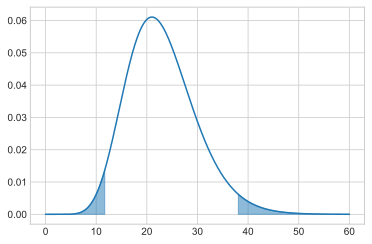

In [17]:
ox = np.linspace(0, 60, 1000)
oy = stats.chi2.pdf(ox, df = df_)

ox_left = np.linspace(0, t1, 200)
oy_left = stats.chi2.pdf(ox_left, df=df_)

ox_right = np.linspace(t2, 60, 200)
oy_right = stats.chi2.pdf(ox_right, df=df_)

plt.plot(ox,oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
plt.show()

5. Статистический тест

Считаем значение статистики от нашей выборки. Сравниваем найденное значение с критической областью $\Omega_{\alpha} $

In [18]:
S = h_statistic(n, sample_var, var)
S

28.720541753333343

Найденное значение не попало в критическую область $\Omega_\alpha = [0, 11.689) \cup (38.076, \infty)$. Нулевая гипотеза остаётся в силе.

___Ответ:___ 1 

---